In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
X = dataset.iloc[:,[3,4]].values

Choosing the number of clusters using the elbow method

In [5]:
from sklearn.cluster import KMeans

In [6]:
WCSS = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",
                   max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    

### The Elbow Method

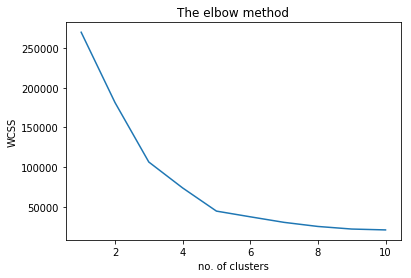

In [7]:
plt.plot(np.arange(1,11),WCSS)
plt.title("The elbow method")
plt.xlabel("no. of clusters")
plt.ylabel("WCSS")
plt.show()

the correct no of clusters is 5

hence fitting the model with 5 clusters

In [8]:
kmeans = KMeans(n_clusters=5,init="k-means++",n_init=10,random_state=0)
Y_kmeans = kmeans.fit_predict(X)

In [9]:
pd.DataFrame(Y_kmeans)

,0
0,4
1,3
2,4
3,3
4,4
5,3
6,4
7,3
8,4
9,3


Visualising the clusters

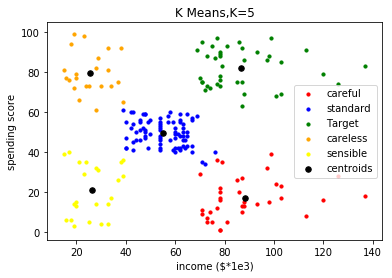

In [10]:
plt.scatter(X[Y_kmeans==0,0],X[Y_kmeans==0,1],label="careful",s=10,c="red")
plt.scatter(X[Y_kmeans==1,0],X[Y_kmeans==1,1],label="standard",s=10,c="blue")
plt.scatter(X[Y_kmeans==2,0],X[Y_kmeans==2,1],label="Target",s=10,c="green")
plt.scatter(X[Y_kmeans==3,0],X[Y_kmeans==3,1],label="careless",s=10,c="orange")
plt.scatter(X[Y_kmeans==4,0],X[Y_kmeans==4,1],label="sensible",s=10,c="yellow")
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=30,
            c ="black",
            label="centroids")
plt.title("K Means,K=5")
plt.xlabel("income ($*1e3)")
plt.ylabel("spending score")
plt.legend()
plt.show()